*Names:* David Gui, Sam Hossain

$\textbf{Background:}$

$\textbf{Cocktail Party Problem:}$ To introduce the idea of independent component analysis (ICA), consider the following problem. There are two different people speaking in a room, and two speakers located in different parts of the room record the audio in the room. However, both of the recordings have recorded a mixture of the speech signals of both people. Given both recordings, how can we separate the speeches of the two people? We can regard each of the two speakers as independent components and use ICA to separate them. Formally, we can let $s_{1}$ and $s_{2}$ be the two original speeches and let $x_{1}$ and $x_{2}$ be the two mixed recordings. Each recording can then be represented as a linear combination of the two speakers:
$x_{1}$ = $a_{11}$$s_{1}$ + $a_{12}$$s_{2}$
$x_{2}$ = $a_{21}$$s_{2}$ + $a_{22}$$s_{2}$
Where A is a 2x2 mixing matrix that we are trying to solve for using ICA and can be influenced by a variety of factors including the type of microphone and the distance from the speaker to the microphone. With this example, we can now define ICA.
Assume there are n independent mixtures of $s_{1}$,$s_{2}$,...,$s_{n}$ called $x_{1}$,$x_{2}$,...,$x_{n}$, where 
$x_{i}$ = $a_{i1}$$s_{1}$ + $a_{i2}$$s_{2}$ + ... + $a_{in}$$s_{n}$
This equation can then be converted into a series of matrix multiplications:
Let x = [$x_{1}$,$x_{2}$,...,$x_{n}$], s = [$s_{1}$,$s_{2}$,...,$s_{n}$], and A = $\left(\begin{array}{cc} a_{11} &...& a_{1n}\\ ... & ... & ... \\ a_{n1} & ...& a_{nn} \end{array}\right)$, and x = As. Then, given only x we then try and estimate s by estimating W = $A^{-1}$ to get $A^{-1}$x = Wx = s, where W is known as the unmixing matrix.

$\textbf{Theory:}$

$\textbf{SVD vs ICA:}$ From class we have discussed the singular value decomposition (SVD). Both SVD and ICA seek to find a basis set of vectors for a given dataset x, but SVD seeks to find directions of uncorrelated data whereas ICA seeks to find directions of independent data. It is important to note that independence is a stronger condition to prove than uncorrelatedness.

It is also important to note that in addition to assuming that our original input s must have independent and non-gaussian components. To illustrate why it's vital that our data be non-gaussian, consider the following example:

Let's say that we observe a mixed signal x and assume that x = As for some mixing matrix A and original signal s. WLOG let s ~ N(0, $I$). Then, cov($x$) = E[($xx^T$)] = E[$(As)(As)^T$] = E[$Ass^{T}A^{T}$] = AE[$ss^T$]$A^T$ = Acov(s)$A^T$ = $AIA^T$ = $AA^T$. Let R be some arbitrary orthonormal matrix such that $RR^T$ = $R^{T}R$ = $I$. Let A' = AR. Then, let the original signal s be mixed according to A' instead of A, we would get:

cov(x) = E[$xx^T$] = E[$A'ss^{T}A'^{T}$] = E[$ARss^{T}R^{T}A^{T}$] = $ARR^{T}A^{T}$ = $AA^T$. So, we get the same distribution of x with both A and any rotation of A = A', thus we are not able to uniquely determine A, and thus we are not able to uniquely determine s. This shows that in order to get a unique solution for ICA we need our original data s to be as non-gaussian as possible.

$\textbf{Conditions for Independence:}$ Typically, to determine independence in $R^n$ where n is the number of components, one would have to find the joint PDF of x and the individual PDFs of $x_1$,...,$x_n$ and check that P($x_1$,...,$x_n$) = P($x_1$) ...           (P($x_n$). In practice, however, this is unfeasible due to the limited amount of data and computational intensity if would take to check the independence condition. Thus, we must find some proxy measure that implies independence. Note that since all components of our original signal s is independent and non-gaussian, any mixture of these signals will tend more towards gaussian due to the Central Limit Theorem, which states that a linear combination of n independent random variables approaches gaussian as N $\rightarrow \infty$. Consider a single component $\hat{s_i}$ = $w_{i}x^T$ where $w_i^T$ is the $i^{th}$ row of the demixing matrix W. Since $\hat{s_i}$ is a linear combination of the components of s, $\hat{s_i}$ is at least equal to or more gaussian than any single component of s. Thus, to find $\hat{s_i}$ = s, we can find a W that maximizes the non-gaussianity of $\hat{s_i}$ so that $\hat{s_i}$ is as non-gaussian as possible since that is when we get closest to $\hat{s_i}$ = ${s_i}$.

$\textbf{Measures of non-gaussianity:}$ A common measure of the non-gaussianity of a random variable is by measuring the kurtosis, defined as kurtosis(x) = E[$x^4$] - $3(E[x^{2}])^2$. However, kurtosis is not useful to implement for ICA since it is very sensitive to outliers(1). A more promising measure of non-gaussianity is to look at the negentropy of a random variable. The entropy of a random variable measures the amount of information gained from observing taht random variable, and is defined as H(x) = $- \int_{-\infty}^{\infty} p(x)\ln(p(x)) \,dx $ for continuous random variables. It is shown that the gaussian random variable has the largest entropy of all random variables that have the same covariance(6) matrix, so we can define negentropy as J(x) = H(x_gauss) - H(x)(6) where x has mean $\mu$ and variance $\sigma$ and x_gauss ~ N($\mu,\sigma$) and note that the entropy of a random variable x is inversely related to its non-gaussianity. Similar to the problem of directly computing independence, directly calculating the negentropy can be difficult and computationally intesive(1) due to the unknown PDF of x. However, there are several approximations for entropy found in literature(1) that circumvent this problem. First, let $\hat{s_i}$ = $w^{T}x$. An approximation for J($\hat{s_i}$) found in (1) is J($\hat{s_i}$) = $c[E{G(y_{i}} - E{G(v)}]^2$ where c is a constant and v is a gaussian random variable of zero mean and unit variance and y is a random variable of zero mean and unit variance, and $G_i$ are known as contrast function. There is no strict requirement for the choice of contrast function as long as it is nonquadratic, but (1) has the following functions as good choices for contrast functions:

$G_{1}(x) = 1/\alpha*logcosh(\alpha*x)$

$G_{2}(x) = -1/\alpha^{2}*exp(\alpha*x^{2}/2)$

$G_{3}(x) = x^4/4$

where $\alpha \in [1,2] $ (for our implementation we chose to fix $\alpha$ to be 1).

Note that if you plug in $G_3$ into the estimate for J(x) you simply get back kurtosis(x). According to (1) $G_2$ is useful when you want your ICA model to be extra robust to noise and outliers, but $G_1$ is the best general-purpose contrast function. In our implementation, we chose to only use $G_1$ as our contrast function, but a future direction could be comparing the performances and times of different contrast functions for ICA. We are now left with an optimization problem of trying to maximize J($\hat{s_i}$). From class we know that we can use gradient descent (gradient ascent in this case) to find local minima and maximima, but similar to the premise in HW9 involving implementing logistic regression, gradient ascent might take too long to converge and instead a better way to calculate the maximum would be to use a fixed-point algorithm revolving around Newton's method. This fixed-point algorithm is the premise for FastICA

$\textbf{Preprocessing Data for FastICA:}$ Before we derive an equation for FastICA, we first must transform our input data x in two different ways. The first preprocessing we do on x is to center x by subtracting its mean. The reason for centering x is to simplify the equations and algorithms for ICA. Since we are simply performing matrix multiplications and linear transformations for ICA, we can simply add back the mean at the end to get the correct result for s.

The second main preprocessing method used in ICA is known as "whitening" or "sphering". After centering the data and before applying ICA, x is linearly transformed such that its components are uncorrelated and their variances are unit normalized. Thus, for $\hat{x}$ we should have that E[$\hat{x}\hat{x}^T$] = $I$ since the mean is zero and the variances are orthonormal. Since we assumed that the individual components of s were independent, the whitening transformation is always valid. The most common method for whitening x is to use the eigendecomposition of the covariance matrix E[$xx^T$] = $EDE^T$ where E is orthogonal and D is the diagonal eigenvalue matrix(9). We can now perform whitening by the following:

$\hat{x} = ED^{-1/2}x$ and we get that E[$\hat{x}\hat{x}^T$] = $I$ as expected(9). While performing the whitening operation, it is also common to perform a dimensionality reduction on the dataset x to discard the eigenvalues of E[$xx^T$] that are too small, and this is done by the SVD that we have learned about in class. In our implementation we found that this dimensionality reducing step helped makae the output images much cleaner. This step helps immensely to reduce noise and prevent overlearning in ICA(9). Whitening also helps to reduce the runtime of the fastICA algorithm, since an orthonormal matrix only has n(n-1)/2 degrees of freedom compared to the $n^2$ degrees of freedom of the normal mixing matrix A, so we have to estimate approximately half as many parameters for A, effectively cutting the runtime in half(9). 

$\textbf{FastICA Algorithm:}$ We are now ready to derive the FastICA algorithm. First, assume that the input data x has been centered and whitened so that cov(x) is an orthonormal matrix. Next, we fix one independent component $\hat{s_i} = w^Tx$, and we maximize J($\hat{s_i}$) = J($w^Tx$) = $[E{G(w^Tx)} - E{G(v)}]^2$. Note that E{G(v)} is independent of w and thus can be regarded as a constant. We can constrain {E$[G(w^{T}x]^2$} = E[$w^Txx^Tw$] = E[$w^Tw$] = $\|w\|^2$ since we whitened x such that E[$\hat{x}\hat{x}^T$] = $I$. We can then fix $\|w\|^2$ = 1 by normalizing w before we carry out each iteration of FastICA. Next, since x remains constant, we can rewrite J($w^Tx$) = J(w). We can now solve for the optima of J(w) by taking the derivative and setting it equal to zero. Note that g(w) = $G^{'}$(w) = $tanh$(w) and $g^{'}$(w) = 1-$tanh(w)^2$. $J^{'}$(w) = E[xg($w^Tx$)] - $\beta*I$ where $\beta$ is a constant and $\beta$ = E[$w_0^Txg(w_0^Tx)$] where $w_0$ is the value of w at the max of J(w). We can then solve of $J^{'}$(w) iteratively using Newton's method. We find the Hessian matrix $J^{''}$(w) = E[$xx^Tg^{'}(w^Tx)$] - $\beta*I$. Newton's method involves inverting $J^{''}$(w) which might prove computationally expensive depending on the number of inputs and the size of the inputs. Instead, we can approximate E[$xx^Tg^{'}(w^Tx)$] = E[$xx^T]E[g^{'}(w^Tx)$] = E[$g^{'}(w^Tx)$]*$I$ since E[$xx^T$] = $I$ since our data is whitened. Now the hessian matrix becomes a diagonal matrix and thus is trivially easy to invert. We now have all the tools in place to define the Newton iteration:

$w_{new}$ = w - [E{$xg(w^Tx)$}-$\beta*w$]*([E{$g^{'}(w^Tx)-\beta$}]$^{-1}$


w = $w_{new}$/$\|w_{new}\|$ (this is the normalization of w from above)

We then repeat the above steps until we have reached our max iterations or until we have reached convergence. A single pass of this algorithm will update only one column of w, and therefore only a single independent component $w^Tx$. To get all n independent components, we must run this algorithm n times, but to ensure that we get unique weights and independent components for each run, we must decorrelate the outputs $w_1^Tx,...,w_n^Tx$ after ech run. There are two main methods currently used to decorrelate the outputs. The first and simpler way of decorrelating is using Gram-Schmidt. Let's say we are on our $i^{th}$ run and we have already found i-1 components. Then, after running our above algorithm, and after each iteration step we subtract $w_i$ with the projections of the previous i-1 vectors $w_1, w_2,..., w_{i-1}$ onto $w_i$ and then renormalize $w_i$. 

$w_i$ = $w_i - \sum_{n=1}^{i-1} w_i^T w_n w_n$

$w_i$ = $w_i/\|w_i\|$

This is what's known as deflationary FastICA, where we decorrelate each weight one at a time.

There is another method that decorrelates the weights known as symmetric decorrelation where you can decorrelate the entire weight matrix at once rather than one at a time as with deflationary decorrelation. This variant of FastICA is known as parallel FastICA. This idea is explored more in (1). For this project we decided to only implement deflationary FastICA, but a future direction this project could take would be to implement parallel FastICA and compare the performances of the two implementations. 

$\textbf{Implementation:}$ 

We will be implementing deflationary FastICA in order to perform image separation. The images were sourced from (6). 

First, lets load in our requirements

In [2]:
#requirements
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.decomposition import FastICA
import numpy as np
from scipy import linalg
import types

Now, we turn to implementation of FastICA. As mentioned above, there are two implementations of this algorithm. We focus on the deflation. For this, we first center and whiten our data, and then iterate over and update our weight calculations specified in $Hyvarinen^1$ until our desired threshold is reached. The deflate identifies a way to decorrelate our extracted components.

In [3]:
def def_decorr(w, W, j):
    ortho = np.zeros_like(w)
    for u in range(j):
        #subtract Grahm-Schmidt projections of previous weights from current weight
        ortho = ortho + w@W[u] * W[u]
        w -= ortho
    return w


def deflate(X, thresh, g, gprime, maxit, w_init):

    n_comp = w_init.shape[0]
    W = np.zeros((n_comp, n_comp), dtype=float)

    # j is the index of the extracted component
    for j in range(n_comp):
        w = w_init[j, :].copy()
        w /= np.sqrt((w**2).sum())

        i = 0
        lim = thresh + 1 
        while ((lim > thresh) & (i < (maxit-1))):
            wtx = w.T@X
            gwtx = g(wtx)
            g_wtx = gprime(wtx)
            w1 = (X * gwtx).mean(axis=1) - g_wtx.mean() * w
            #decorrelate previous weights
            def_decorr(w1, W, j)
            #normalize w
            w1 /= np.sqrt((w1**2).sum())
            #update convergence condition
            lim = np.abs(np.abs((w1 * w).sum()) - 1)
            w = w1
            i =+ 1
            
        W[j, :] = w

    return W    

def fastica_deflate(X, algorithm="", iter_=200, thresh=1e-04):
   
    #define our functions g and g prime as specified above

    def g(x):
        return np.tanh(x)
    def gprime(x):
        return (1 - (np.tanh(x))**2)

    p, n = X.shape
    
    #there are many more pixels than there are distinct images, so we want n to be the number of distinct images
    n_comp = min(n, p)
        
    # Centering
    X = X - X.mean(axis=-1)[:, np.newaxis]

    # PCA used to whiten--explained above
    u, d, temp = linalg.svd(X, full_matrices=False)
    comp = (u/d).T[:n_comp]
    X1 = comp@X 
   
    X1 *= np.sqrt(n)

    #initalize our starting weights as random
    w_init = np.random.normal(size=(n_comp, n_comp))
    
    W = deflate(X1, thresh, g, gprime, iter_, w_init)

    S = (W@comp)@X
    return S

The application we are going to focus on has to do with images. We will be pulling three images from the image folder (which is in ./ and can be modified at any time) and combining them via a pseudorandom matrix A. From this we will have three images with components from each of the original, independent images. Before we can do this, lets define some utility functions to enable us to convert raw images into usable formats for our FastICA functions.

In [4]:
#some functions we will use throughout
def list_im(names, path):
    im_list = []
    
    for name in names:
        im = io.imread(path + "/" + name + ".jpg", as_gray=True)
        im = resize(im, (70, 70))
        im = rgb2gray(im)
        im_list.append(im)
        
    return im_list

def imPlot(images, path, save=False):
    figure = plt.figure()
    coord = 100 + 10*len(images) + 1
    
    for i, im in enumerate(images):
        figure.add_subplot(coord)
        plt.axis('off')
        plt.imshow(im, cmap='gray')
        coord += 1
    if save:
        plt.savefig(path + ".jpg")
    plt.show()
    
def list_to_matrix(images):
    matrix_layers = []
    for image in images:
        matrix_layers.append(image.ravel())
        
    m = np.vstack(matrix_layers)
    return m

def matrix_to_list(matrix):
    image_list = []
    for row in matrix.T:
        image = np.reshape(row, (70, 70))
        image_list.append(image)

    return image_list

Now, lets pull our data and display it (Images taken fro$m^1$)

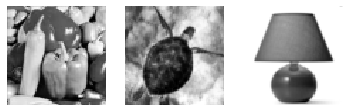

In [114]:
images = list_im(["peppers", "turtle", "lamp"], "./images")
imPlot(images, "", False)

Now, lets define a mixing matrix A and show some output.

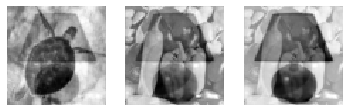

In [120]:
def mix(images, A):
    matrix = list_to_matrix(images)
    mixed = matrix.T@A
    return mixed

A = np.array([[.2, 1, .6], [1, .3, .2], [0.5, .6, 1]])
#A = np.array([[.4, 1],[.3, .8]])
#mix, convert, and display our images
imPlot(matrix_to_list(mix(images, A)),"",False)

Finally, lets take our mixed images and apply our ICA algorithm to them. (We did not attempt to mess with step sizes, so it may take some playing around with iter_ and thresh to find the components.)

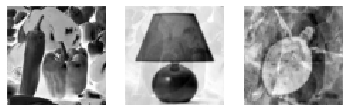

In [119]:
X = mix(images,A)
s = fastica_deflate(X.T, iter_=2000, thresh=1e-07)
#convert back
imPlot(matrix_to_list(s.T),"",False)

In no specific order, we see that we have extracted our three original signals.

$\textbf{References:}$

1) Hyvarinen, A. “Fast and Robust Fixed-Point Algorithms for Independent Component Analysis.” IEEE Transactions on Neural Networks, vol. 10, no. 3, 1999, pp. 626–634., doi:10.1109/72.761722. Hyvärinen, A., and E. Oja. “Independent Component Analysis: 

2) Algorithms and Applications.” Neural Networks, vol. 13, no. 4-5, 2000, pp. 411–430., doi:10.1016/s0893-6080(00)00026-5. 

3) Lee, Intae, et al. “Fast Fixed-Point Independent Vector Analysis Algorithms for Convolutive Blind Source Separation.” Signal Processing, vol. 87, no. 8, 2007, pp. 1859–1871., doi:10.1016/j.sigpro.2007.01.010. 

4) Maino, D., et al. “All-Sky Astrophysical Component Separation with Fast Independent Component Analysis (FASTICA).” Monthly  Notices of the Royal Astronomical Society, vol. 334, no. 1, 2002, pp. 53–68., doi:10.1046/j.1365-8711.2002.05425.x. 

5) Oja, E., and Zhijian Yuan. “The FastICA Algorithm Revisited: Convergence Analysis.” IEEE Transactions on Neural Networks, vol. 17, no. 6, 2006, pp. 1370–1381., doi:10.1109/tnn.2006.880980. 

6) Khaparde, Arti & Madhavilatha, M & Manasa, + & Babu, P & Kumar, S. (2008). FastICA algorithm for the separation of mixed images. WSEAS Transactions on Signal Processing. 4. 


7) El-Khamy, Said & Youssef, El-Sayed & El-Arabawi, Ahmed & Mansour, Abed. (2018). Blind Image Separation Using Independent Component Analysis Together with Image Processing Techniques. 

8) Hyvärinen, Aapo, and Erkki Oja. “A Fast Fixed-Point Algorithm for Independent Component Analysis.” Neural Computation, vol. 9, no. 7, 1997, pp. 1483–1492., doi:10.1162/neco.1997.9.7.1483.  (symmetric decorrelation)

9) Hyvärinen, A., and E. Oja. “Independent Component Analysis: Algorithms and Applications.” Neural Networks, vol. 13, no. 4-5, 2000, pp. 411–430., doi:10.1016/s0893-6080(00)00026-5. 